In [1]:
import chronos as cr

#to list available cluster catalogs
cr.cluster.CATALOG_LIST

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


['CantatGaudin2020',
 'CantatGaudin2018',
 'Babusiaux2018',
 'Gagne2018',
 'Bossini2019',
 'Sampedro2017',
 'Randich2018',
 'Karchenko2013',
 'Dias2016',
 'Curtis2019',
 'Lodieu2019']

## Loading cluster catalogs

In [2]:
#initialize
cc = cr.ClusterCatalog()

#CantatGaudin2020 is as default
df = cc.query_catalog(return_members=False)
df.shape

{'J/A+A/633/A99/members': '*Members',
 'J/A+A/633/A99/table1': 'Mean parameters of the identified clusters'}
Saved: /home/jp/github/research/project/chronos/chronos/../data/CantatGaudin2020/CantatGaudin2020_tab0.txt
Saved: /home/jp/github/research/project/chronos/chronos/../data/CantatGaudin2020/CantatGaudin2020_tab1.txt
Using CantatGaudin2020 catalog.


(1481, 17)

In [3]:
df_mem = cc.query_catalog(return_members=True)
df_mem.shape

Using CantatGaudin2020 catalog.


(435833, 13)

## search cluster members and properties

In [4]:
#compare IC_2602 members from two different catalogs

cluster_name = 'IC_2602'

c1 = cr.Cluster(catalog_name='CantatGaudin2020', 
             cluster_name=cluster_name, 
             verbose=False)

c2 = cr.Cluster(catalog_name='Bouma2019', 
             cluster_name=cluster_name, 
             verbose=False)

In [5]:
df1 = c1.query_cluster_members()
df2 = c2.query_cluster_members()

df1.shape, df2.shape

((311, 13), (4655, 20))

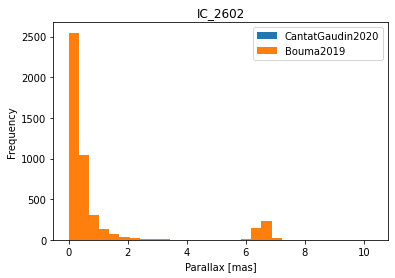

In [6]:
import matplotlib.pyplot as pl

df1['parallax'].plot(kind='hist', bins=30, label=c1.catalog_name)
df2['parallax'].plot(kind='hist', bins=30, label=c2.catalog_name)
pl.title(cluster_name)
pl.xlabel('Parallax [mas]')
pl.legend()

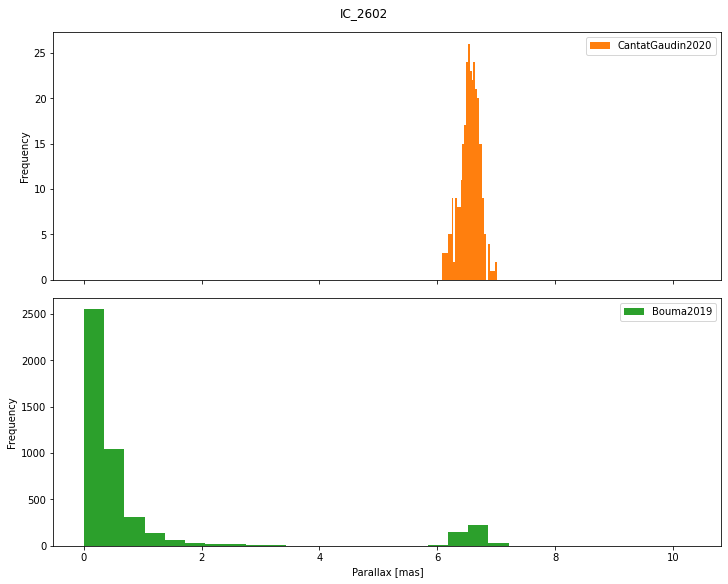

In [7]:
fig, ax = pl.subplots(2,1, figsize=(10,8), sharex=True, constrained_layout=True)

df1['parallax'].plot(ax=ax[0], kind='hist', color='C1', bins=30)
df2['parallax'].plot(ax=ax[1], kind='hist', color='C2', bins=30)
ax[1].set_xlabel('Parallax [mas]')
fig.suptitle(cluster_name)
ax[0].legend([c1.catalog_name])
ax[1].legend([c2.catalog_name])

Bouma+2019 has more (mis-labeled) members but CantatGaudin+2020 has more realiable members.

## membership

In [8]:
import chronos as cr

t = cr.Target(toiid=837)
cluster = t.get_cluster_membership()

Target: TIC 460205581
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.
ra: 11 matched
dec: 20 matched
parallax: 6 matched
pmra: 6 matched
pmdec: 8 matched
RV: 343 matched
matched 5 params in IC_2602:
['ra' 'dec' 'parallax' 'pmra' 'pmdec']


## find nearest cluster to target

In [9]:
import chronos as cr

t = cr.Target(toiid=837)
d = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

Target: TIC 460205581
Querying Gaia DR2 catalog for ra,dec=(157.037 -64.5052) within 3.0 arcsec.
There are 2 gaia sources within 3.0 arcsec.


In [10]:
#3d coordinates
t.target_coord

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    (157.03729167, -64.50521111, 143.07643772)>

In [11]:
nearest_cluster_member = t.get_nearest_cluster_member(catalog_name="CantatGaudin2020", match_id=False)

Using CantatGaudin2020 catalog.


In [12]:
#nearest star in a cluster
t.nearest_cluster_member

raJ2015                        157.037
decJ2015                      -64.5052
source_id          5251470948229949568
parallax                        6.9893
pmra                           -18.017
pmdec                           11.307
RV                             17.4453
phot_g_mean_mag                 10.356
bp_rp                           0.8076
Proba                              0.9
Cluster                        IC_2602
ra                             157.037
dec                           -64.5053
Name: 143290, dtype: object

In [13]:
#nearest cluster
t.nearest_cluster_members

,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,RV,phot_g_mean_mag,bp_rp,Proba,Cluster,ra,dec
142981,165.895228,-64.740238,5240284894897063424,6.0890,-17.998,8.997,NaN,16.6051,2.8991,1.0,IC_2602,165.895409,-64.740277
142982,167.590417,-65.189293,5240153876885812992,6.1054,-19.354,9.959,NaN,17.9656,3.6294,0.9,IC_2602,167.590615,-65.189336
142983,157.707739,-68.228231,5232928887204721920,6.1058,-16.988,9.610,NaN,16.7511,3.1202,0.9,IC_2602,157.707937,-68.228273
142984,162.535640,-64.571155,5239635972552224512,6.1333,-17.162,9.307,NaN,17.7571,3.1107,1.0,IC_2602,162.535812,-64.571196
142985,160.063730,-65.484692,5239299835545363328,6.1405,-17.384,10.692,NaN,17.5610,3.5604,1.0,IC_2602,160.063910,-65.484738
...,...,...,...,...,...,...,...,...,...,...,...,...,...
143287,161.191413,-65.907201,5239088316996695808,6.9113,-18.749,11.906,NaN,14.9004,2.6350,0.9,IC_2602,161.191611,-65.907252
143288,156.286836,-63.344328,5252147938168573312,6.9476,-17.918,12.433,NaN,16.4751,3.0686,0.9,IC_2602,156.287008,-63.344382
143289,160.350751,-63.897952,5239911129666148096,6.9537,-18.889,10.666,NaN,17.4597,3.4301,0.9,IC_2602,160.350936,-63.897998
143290,157.037281,-64.505211,5251470948229949568,6.9893,-18.017,11.307,17.445309,10.3560,0.8076,0.9,IC_2602,157.037461,-64.505259


In [14]:
t.nearest_cluster_name

'IC_2602'

## plotting

In [16]:
import matplotlib.pyplot as pl
import chronos as cr

Most catalogs do not have radial_velocity in their members list so we need to query gaia catalog for each members.

In [17]:
t = cr.Target(toiid=837, verbose=False)
gaia_params = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)

There are 2 gaia sources within 3.0 arcsec.


In [18]:
t.get_nearest_cluster_member()

Using CantatGaudin2020 catalog.


,raJ2015,decJ2015,source_id,parallax,pmra,pmdec,RV,phot_g_mean_mag,bp_rp,Proba,Cluster,ra,dec
143290,157.037281,-64.505211,5251470948229949568,6.9893,-18.017,11.307,17.445309,10.356,0.8076,0.9,IC_2602,157.037461,-64.505259


In [4]:
cluster_name = t.nearest_cluster_name
cluster_name

'IC_2602'

In [19]:
c = cr.Cluster(cluster_name=cluster_name)

Using CantatGaudin2020 catalog.


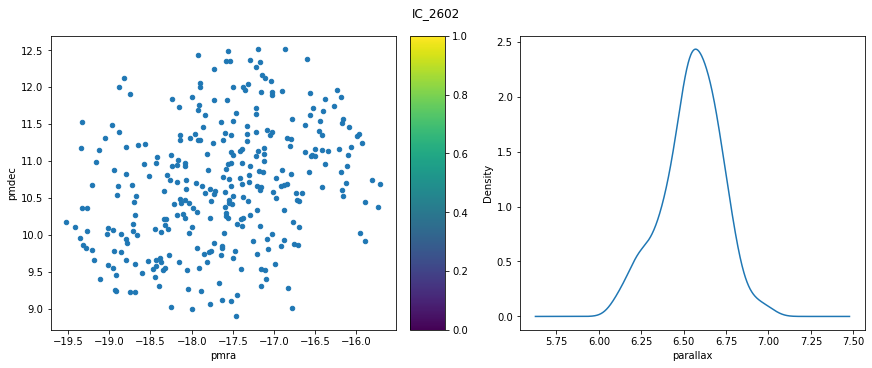

In [20]:
#plot cluster members 
fig = c.plot_cluster_members(x='pmra', y='pmdec', z='parallax');

### CMD

Loaded: /home/jp/github/research/project/chronos/chronos/../data/IC_2602_members.hdf5


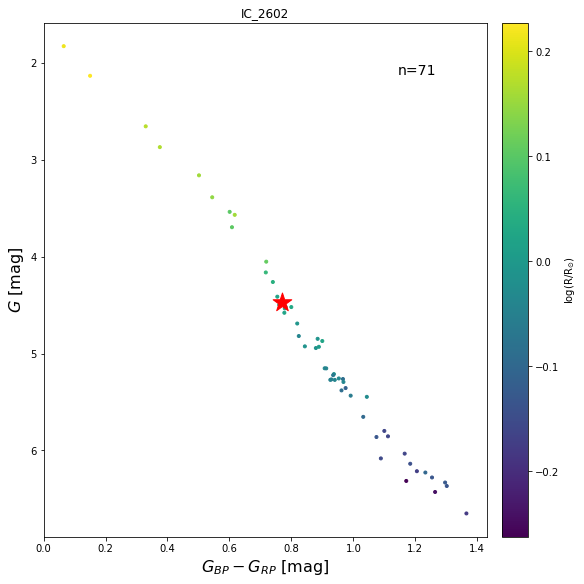

In [21]:
ax = c.plot_cmd(target_gaiaid=t.gaiaid)

Loaded: /home/jp/github/research/project/chronos/chronos/../data/IC_2602_members.hdf5


Text(0.5, 0, 'Bp-Rp')

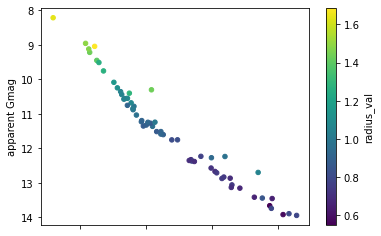

In [22]:
#for comparison
df_gaia_mem = c.query_cluster_members_gaia_params()
df_gaia_mem = df_gaia_mem[df_gaia_mem.source_id.astype(int).isin(c.cluster_members.source_id)]

df_gaia_mem.plot.scatter(x='bp_rp',y='phot_g_mean_mag',c='radius_val',cmap='viridis')
pl.gca().invert_yaxis()
pl.ylabel('apparent Gmag')
pl.xlabel('Bp-Rp')

Extinctions are taken into account to compute intrinsic colors and absolute magnitudes .

### HRD

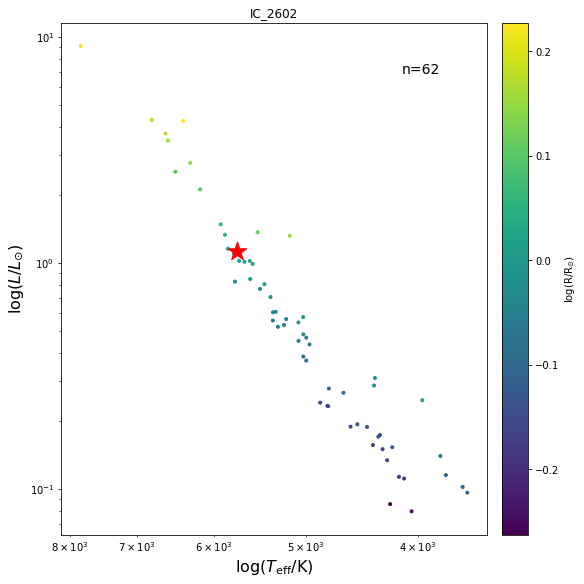

In [23]:
ax = c.plot_hrd(target_gaiaid=t.gaiaid)

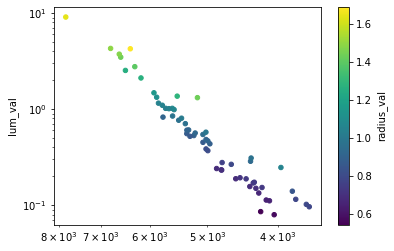

In [24]:
#for comparison
df_gaia_mem.plot.scatter(x='teff_val',y='lum_val',c='radius_val',cmap='viridis')
pl.xscale('log')
pl.yscale('log')
pl.gca().invert_xaxis()

## kinematics

There are 2 gaia sources within 3.0 arcsec.
Using CantatGaudin2020 catalog.
Loaded: /home/jp/github/research/project/chronos/chronos/../data/IC_2602_members.hdf5


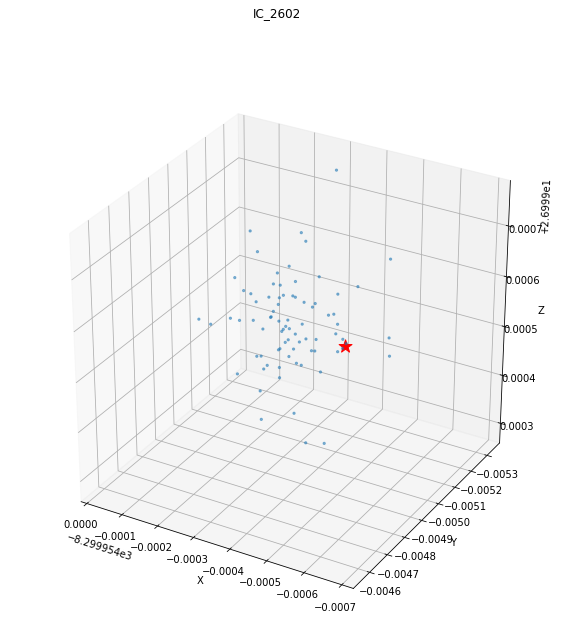

In [25]:
import chronos as cr

t = cr.Target(toiid=837, verbose=False)
gaia_params = t.query_gaia_dr2_catalog(return_nearest_xmatch=True)
c = cr.Cluster(cluster_name="IC_2602")

fig = c.plot_xyz_3d(target_gaiaid=t.gaiaid, zlim=(0,100));

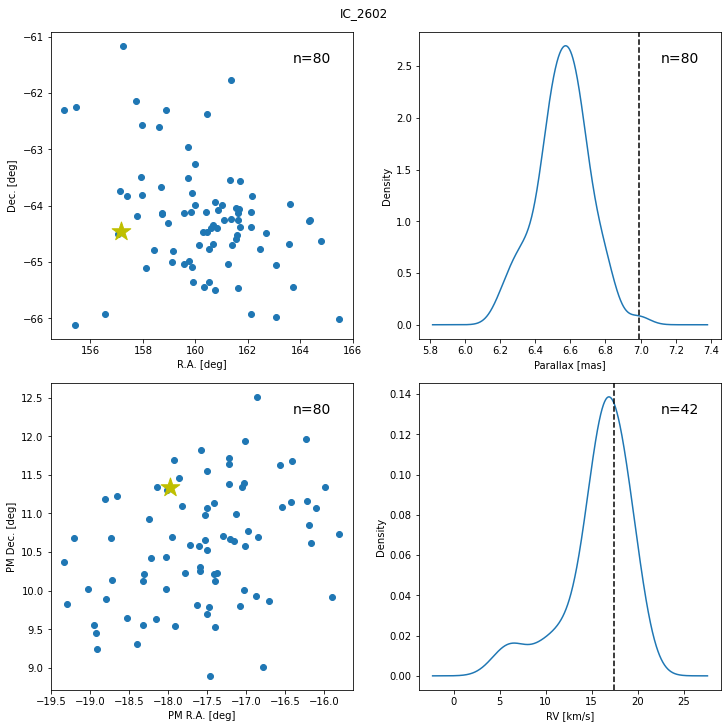

In [26]:
fig = c.plot_rdp_pmrv(target_gaiaid=t.gaiaid);

## kinematics (galactocentric frame)

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [ ]:
c1 = cr.Cluster("IC_2602")
# ax1 = c1.plot_cmd()

c2 = cr.Cluster("RSG_7")
# _ = c2.plot_cmd(ax=ax1)

In [3]:
cr.plot_cmd?

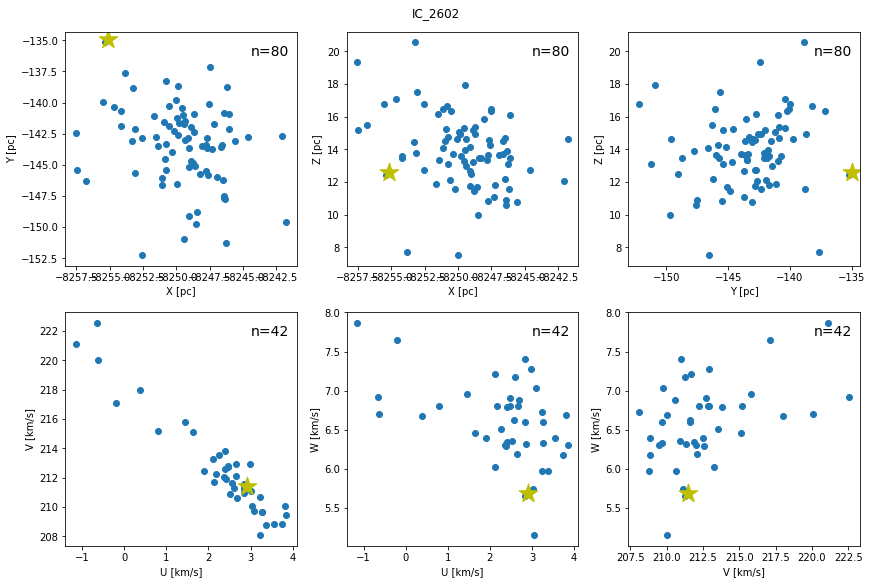

In [27]:
fig = c.plot_xyz_uvw(target_gaiaid=t.gaiaid);

## get gaia params for each TOI

In [33]:
toi_gaia_params.tail()

,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,...,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
TOI,,,,,,,,,,,,,,,,,,,,,
1760.01,1635721458409799680,Gaia DR2 2264839952875245696,2264839952875245696,1058312986,2015.5,290.174,0.0439117,73.196,0.0447185,32.718,...,0.0077,0.204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000316931
1761.01,1635721458409799680,Gaia DR2 2268464325450037120,2268464325450037120,1622580235,2015.5,281.578,0.0206144,75.3034,0.0219935,4.09427,...,NaN,NaN,200111,1.26612,1.21754,1.29969,1.7775,1.76001,1.795,0.000297675
1762.01,1635721458409799680,Gaia DR2 565485809489763200,565485809489763200,452491136,2015.5,17.915,0.0236767,79.1655,0.0229884,5.71187,...,0.0207,0.0977,200111,0.988621,0.970752,1.00851,0.876333,0.869766,0.8829,5.32008e-05
1763.01,1635721458409799680,Gaia DR2 1655531398063340800,1655531398063340800,1281139718,2015.5,259.564,0.0271223,74.3027,0.0314107,11.326,...,0.0399,0.355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.61871e-05
1764.01,1635721458409799680,Gaia DR2 2150615301929051136,2150615301929051136,380440912,2015.5,277.293,0.02376,55.3131,0.0330656,11.4275,...,0.0459,0.2767,200111,0.596682,0.55162,0.616934,0.127546,0.127046,0.128046,0.000334874


## get nearest cluster for each TOI

See scripts and also known_cluster_host_stars.ipynb.

## isochrone fitting